In [114]:
import numpy as np
import pandas as pd

# 展示
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp
# Sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import metrics

- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other - than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [115]:
train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

In [116]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [118]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [120]:
train.drop(2744604,inplace=True)

In [121]:
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


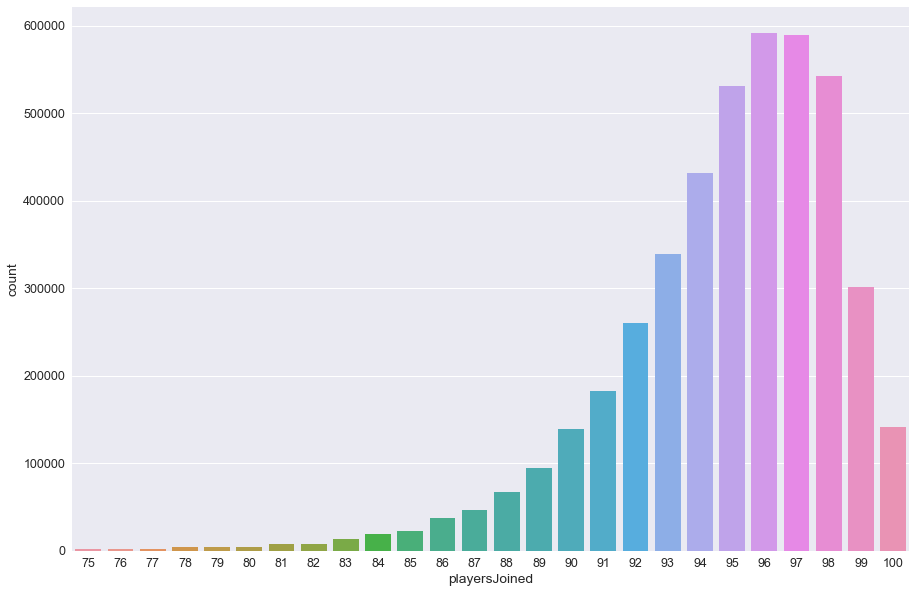

In [124]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.show()

In [125]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [128]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100+1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100+1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100+1)
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,1930,1987.90


### 对于开挂的，应当给他们剔除掉

In [130]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killWithoutMoving'] = ((train['kills']>0)&(train['totalDistance']==0))

In [131]:
train['headshot_rate'] = train['headshotKills']/train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [132]:
train[train['killWithoutMoving']==True].shape

(1535, 36)

In [133]:
train.drop(train[train['killWithoutMoving']==True].index,inplace=True)

In [136]:
train[train['roadKills']>1].shape

(1749, 36)

In [137]:
train.drop(train[train['roadKills']>10].index,inplace=True)

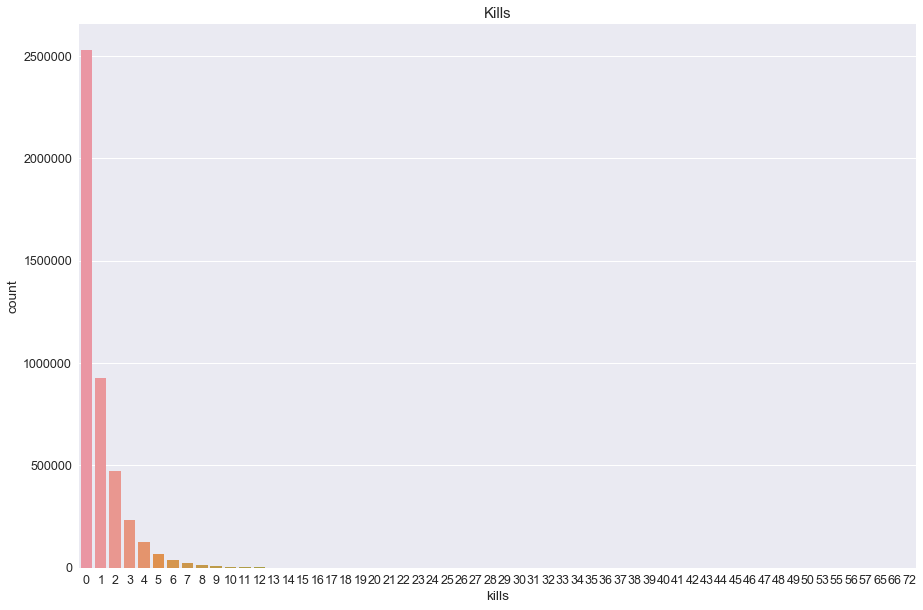

In [141]:
plt.figure(figsize=(15,10))
sns.countplot(data=train,x=train['kills']).set_title('Kills')
plt.show()

In [143]:
train[train['kills']>10].shape

(8120, 36)

In [144]:
train.drop(train[train['kills']>30].index,inplace=True)

<Figure size 1080x720 with 0 Axes>

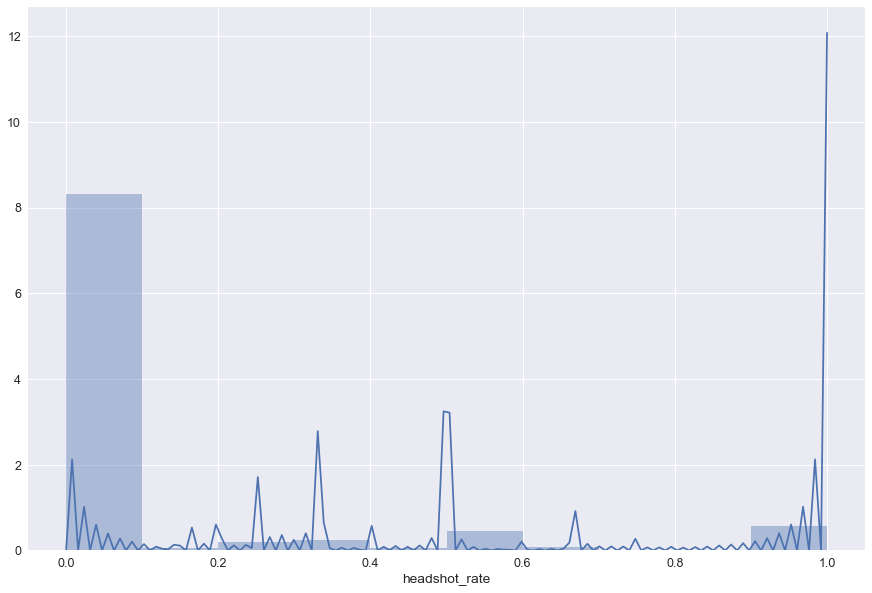

In [146]:
plt.figure(figsize=(15,10))
sns.distplot(train['headshot_rate'],bins=10)
plt.show()

### categorical变量

In [148]:
train['matchType'].nunique()

16

In [149]:
train = pd.get_dummies(train,columns=['matchType'])
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,0,0,0,0,0,1,0,0


In [152]:
train['matchId'] = train['matchId'].astype('category')
train['groupId'] = train['groupId'].astype('category')

In [155]:
train.drop(columns=['Id'],inplace=True)

#### 单排，双排，四排

In [156]:
solos=train[train['numGroups']>50]
duos=train[(train['numGroups']>25)&(train['numGroups']<=50)]
squads=train[train['numGroups']<=25]

In [157]:
len(solos)/len(train)

0.15947923787902407

In [158]:
len(duos)/len(train)

0.7412845072729117

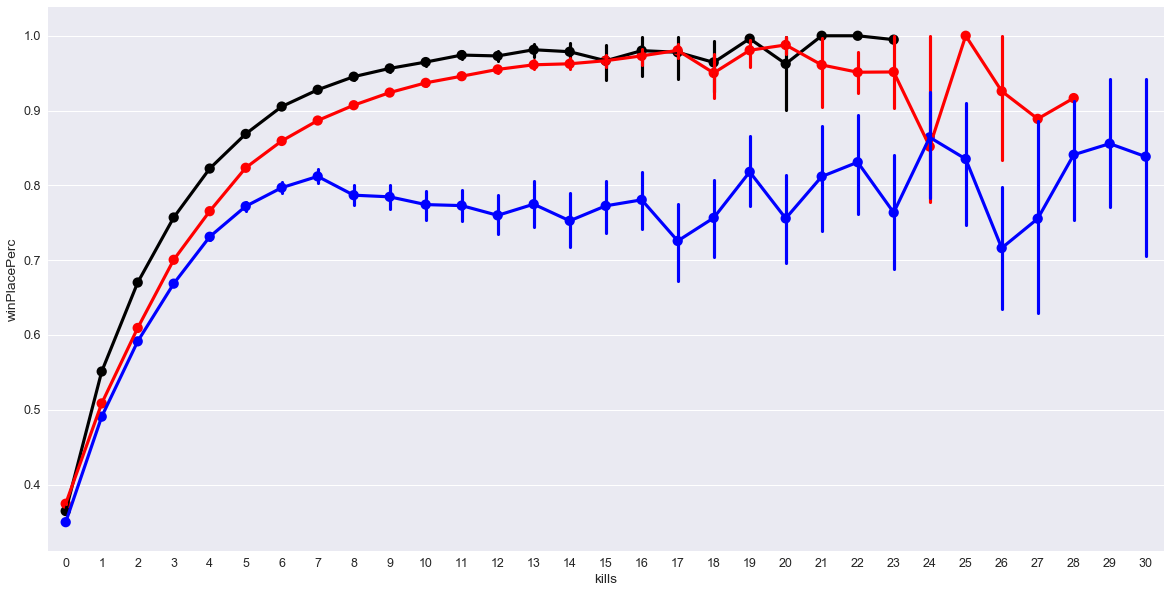

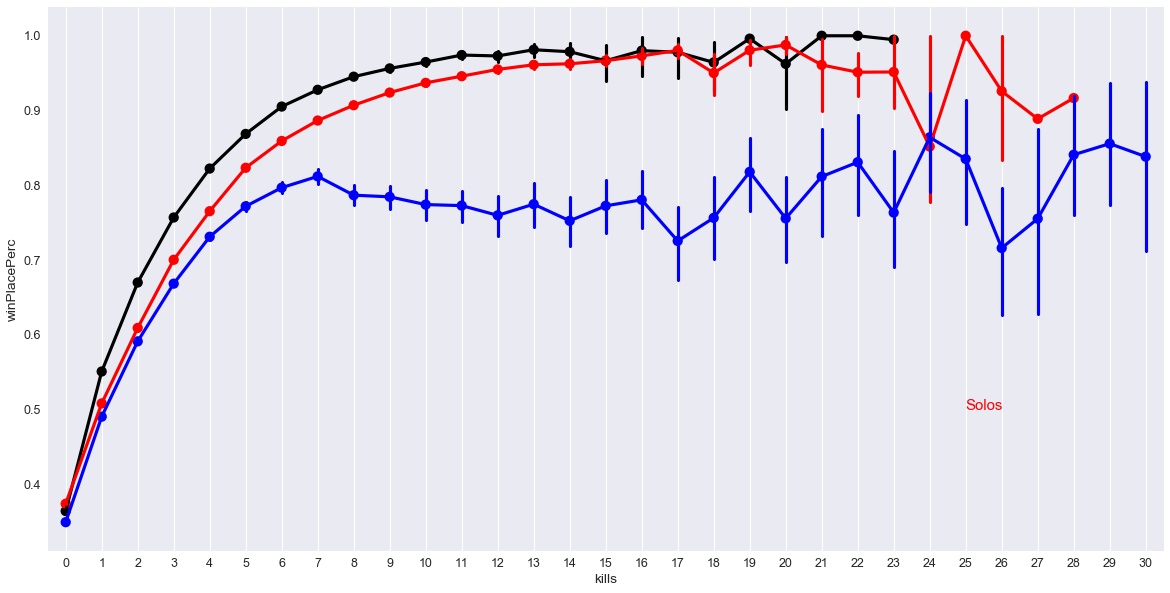

In [161]:
f,ax =plt.subplots(figsize=(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.8)
plt.text(25,0.5,'Solos',color='red')
plt.grid()
plt.show()

#### corr

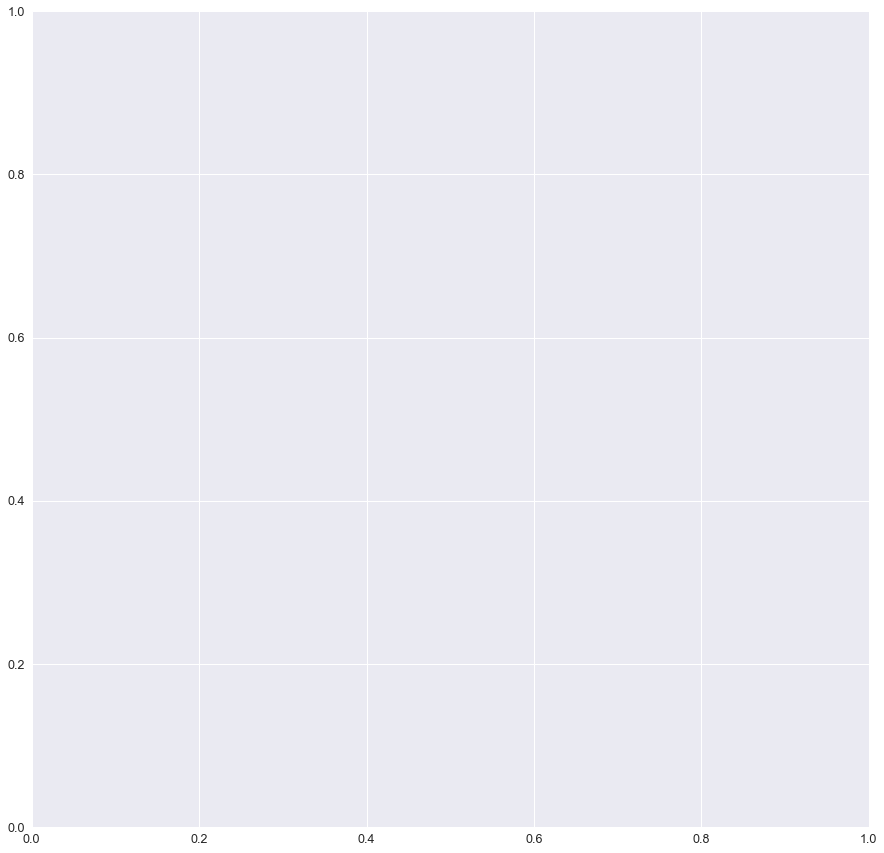

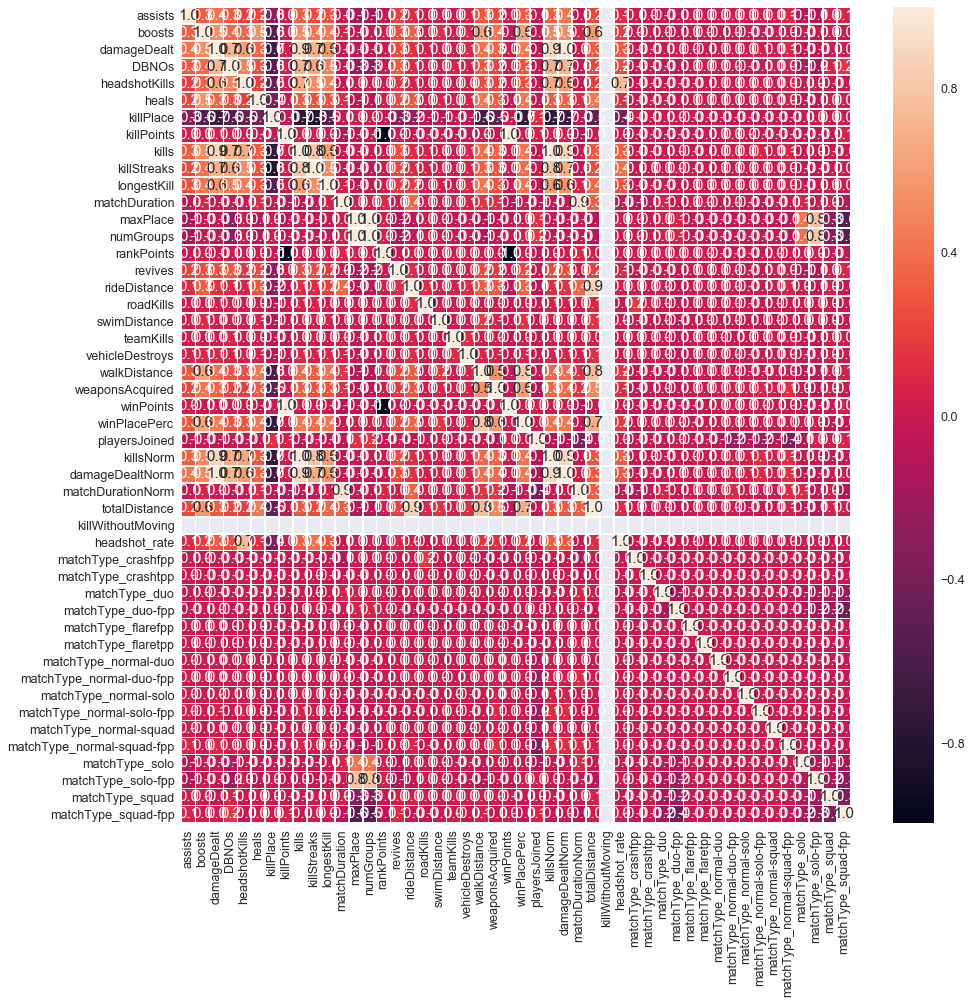

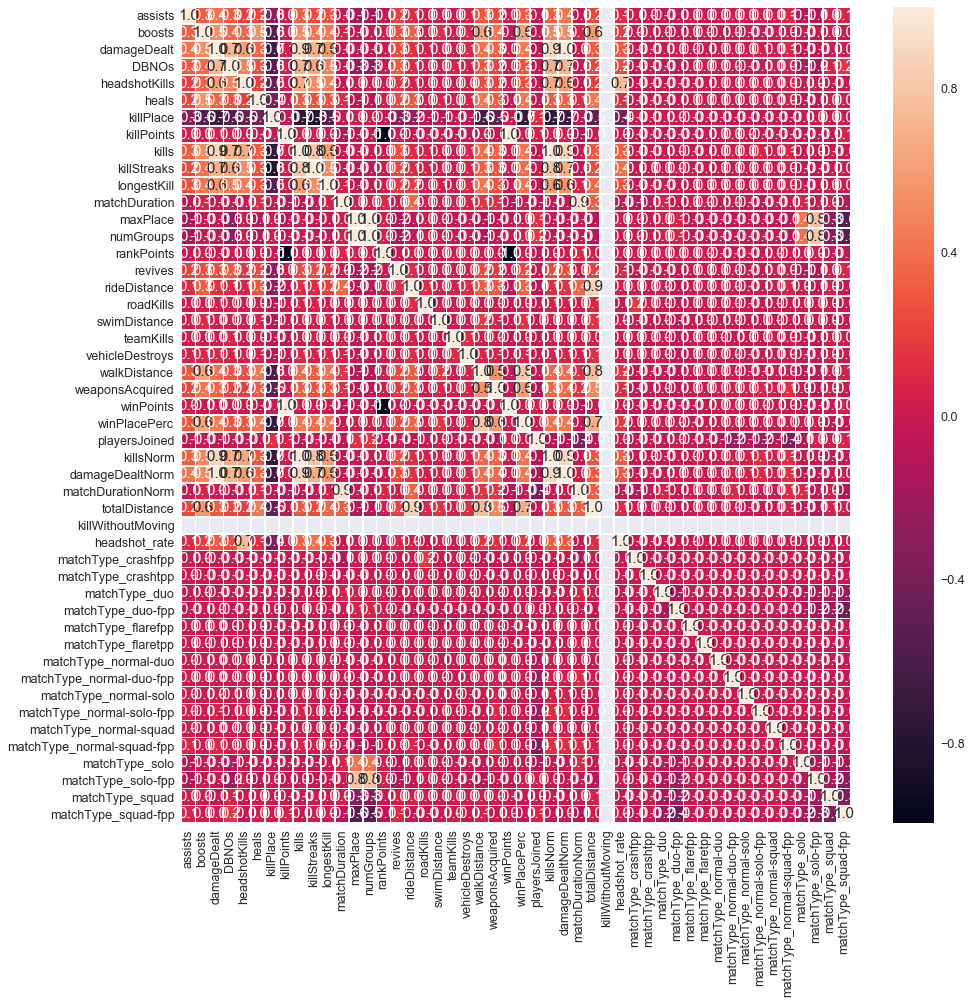

In [164]:
f,ax =plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

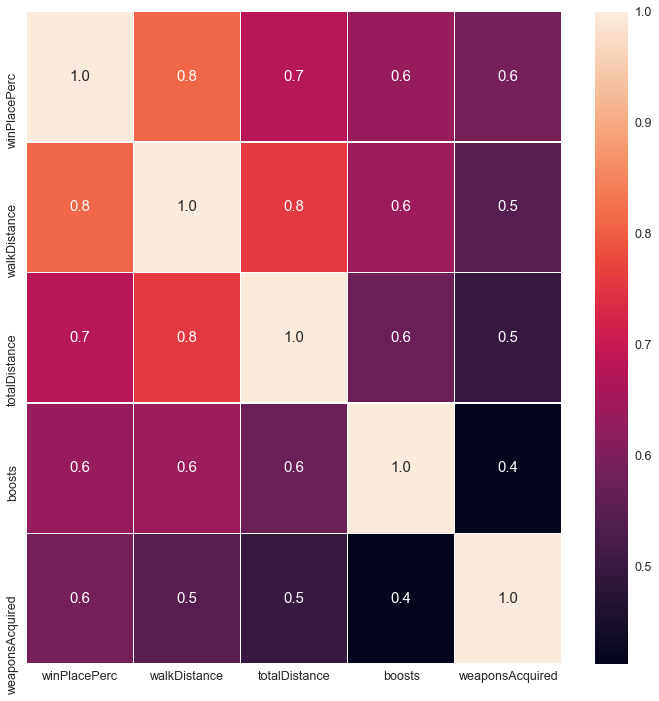

In [166]:
k = 5
f,ax =plt.subplots(figsize=(12,12))
cols = train.corr().nlargest(k,'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm,annot=True,linewidths=0.5,fmt='.1f',ax=ax,yticklabels=cols.values,xticklabels=cols.values)
plt.show()

### 建模

In [178]:
df_sample.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
1980592,0,0,0.00,0,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2448157,0,1,40.13,0,0,1,45,1024,0,0,...,0,0,0,0,0,0,0,0,1,0
2128667,0,0,0.00,0,0,0,70,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3913225,0,0,0.00,0,0,0,79,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980818,0,0,46.92,0,0,1,52,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
sample = 500000
df_sample = train.sample(sample)
df_sample.drop(columns = ['groupId','matchId'],inplace=True)

In [180]:
df = df_sample.drop(columns=['winPlacePerc'])
y = df_sample['winPlacePerc']

In [181]:
X_train,X_valid,y_train,y_valid = train_test_split(df,y,random_state=1)

In [182]:
def print_score(m):
    res= ['mae train',mean_absolute_error(m.predict(X_train),y_train),
         'mae val',mean_absolute_error(m.predict(X_valid),y_valid)]
    print (res)

In [183]:
from sklearn.metrics import mean_absolute_error
m1 = RandomForestRegressor(n_estimators=50,n_jobs=-1)
m1.fit(X_train,y_train)
print_score(m1)

['mae train', 0.021762396328252453, 'mae val', 0.058309784584455536]


In [184]:
m1.feature_importances_

array([1.35089375e-03, 4.87875324e-03, 3.32787366e-03, 3.68641782e-03,
       3.82363312e-04, 2.64745662e-03, 1.80408541e-01, 2.32876452e-03,
       2.69482315e-03, 2.92096788e-03, 5.21641404e-03, 8.68030154e-03,
       5.49998219e-03, 9.88430257e-03, 4.29501554e-03, 7.88414670e-04,
       1.91100321e-03, 4.66435583e-05, 6.18390314e-04, 2.47636965e-04,
       8.75905989e-05, 6.78730778e-01, 3.83837336e-03, 2.63527017e-03,
       1.83260527e-02, 9.11648154e-03, 3.63214124e-03, 1.17871960e-02,
       2.64370862e-02, 0.00000000e+00, 6.58062557e-04, 1.93873550e-05,
       1.03040286e-06, 2.40822626e-04, 4.06550376e-04, 4.99149059e-06,
       1.03070725e-05, 1.61284732e-06, 3.84765144e-05, 5.58591717e-06,
       1.44720204e-05, 1.58473274e-05, 1.79677780e-04, 1.27493547e-04,
       2.55436001e-04, 1.11125703e-03, 5.03059736e-04])

In [190]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,'imp':m.feature_importances_}).sort_values('imp',ascending=False)

In [191]:
rf_feat_importance(m1,df)

,cols,imp
21,walkDistance,0.678731
6,killPlace,0.180409
28,totalDistance,0.026437
24,playersJoined,0.018326
27,matchDurationNorm,0.011787
13,numGroups,0.009884
25,killsNorm,0.009116
11,matchDuration,0.008680
12,maxPlace,0.005500
10,longestKill,0.005216


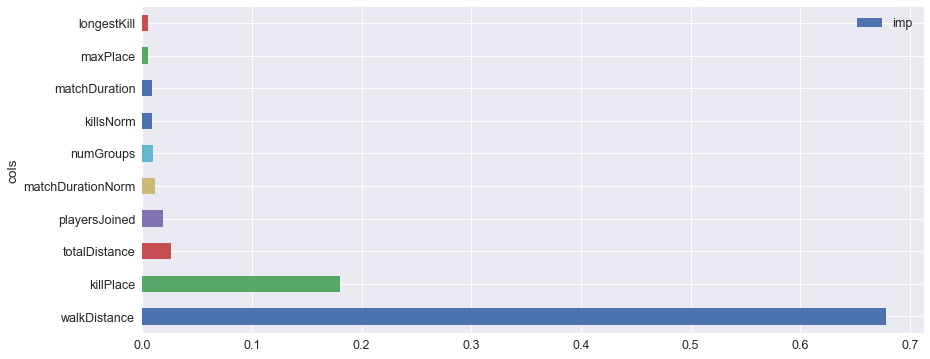

In [194]:
rf_feat_importance(m1,df)[:10].plot('cols','imp',figsize=(14,6),kind='barh')
plt.show()

In [ ]:
fi=rf_feat_importance(m1,df)

In [208]:
to_keep = fi[fi.imp>0.02].cols
to_keep

21       walkDistance
6           killPlace
29      totalDistance
1              boosts
22    weaponsAcquired
5               heals
26    damageDealtNorm
2         damageDealt
16       rideDistance
10        longestKill
Name: cols, dtype: object

In [209]:
X_train,X_valid = X_train[to_keep],X_valid[to_keep]

In [210]:
m2 = RandomForestRegressor(n_estimators=50,n_jobs=-1)
m2.fit(X_train,y_train)
print_score(m2)

['mae train', 0.029341054777938774, 'mae val', 0.07770080750538866]
